In [1]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

print(__doc__)

#filename = get_testdata_files('CT_small.dcm')[0]
filename = "brains/ID_0a96a5b9b.dcm"
dataset = pydicom.dcmread(filename)
# print("File: "+filename)
# # Normal mode:
# print()
# print("Filename.........:", filename)
# #print("Storage type.....:", dataset.SOPClassUID)
# print()

# pat_name = dataset.PatientName
# display_name = pat_name.family_name + ", " + pat_name.given_name
# print("Patient's name...:", display_name)
# print("Patient id.......:", dataset.PatientID)
# print("Modality.........:", dataset.Modality)
# print("Study Date.......:", dataset.StudyDate)

# if 'PixelData' in dataset:
#     rows = int(dataset.Rows)
#     cols = int(dataset.Columns)
#     print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
#         rows=rows, cols=cols, size=len(dataset.PixelData)))
#     if 'PixelSpacing' in dataset:
#         print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
# print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
# plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
# plt.show()
print(dataset.pixel_array)

Automatically created module for IPython interactive environment


FileNotFoundError: [Errno 2] No such file or directory: 'brains/ID_0a96a5b9b.dcm'

Move stage_2_train.csv into an array with 3 columns: one for ID, one for type of hemorrhage, and one for diagnosis.

In [56]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files
import torch

In [66]:
def prep_dataframe(directory, csv, count):
    
    #GPU or CPU?
#     if torch.cuda.is_available():  
#       dev = "cuda:0" 
#     else:  
#       dev = "cpu"  
#     device = torch.device(dev)
    
    diagnoses = pd.read_csv(csv)[0:count+1]
    diagnoses = diagnoses.to_numpy()
    more = np.empty((len(diagnoses), 3), dtype = 'U18')
    for x in range(len(diagnoses)):
        more[x][0] = diagnoses[x][0][3:12]
        more[x][1] = diagnoses[x][0][13:]

    more[:,2] = diagnoses[:,1]

    test_list = os.listdir(directory)[0:count+1]
    image_arrays = np.zeros([512, 512])
    df = pd.DataFrame(columns = ["Image", "ID", "Diagnoses", "Hemmorhage"])

    for file in test_list:
        if(file != ".DS_Store"):
            dataset = pydicom.dcmread(directory+"/"+file, force = True)
            #image_arrays = np.dstack((image_arrays, dataset.pixel_array))
            try:
                diagnoses = more[:,1:][more[:,0]==file[3:12]]
                filtered_diagnoses = diagnoses[:,0][diagnoses[:,1]=='1']
                any_diagnosis = filtered_diagnoses.size != 0
                df = df.append({"Image": dataset.pixel_array, "ID": file[3:12], 
                                "Diagnoses": filtered_diagnoses, 
                               "Hemmorhage": any_diagnosis}, ignore_index = True)
            except:
                print("Error with file "+file)  
    return df

In [58]:
# directory = "/home/wustl/brooks.kennedy/stage_2_train"
# csv = "/home/wustl/brooks.kennedy/stage_2_train.csv"
# def prep_true_dataframe(directory, csv):
# #     #GPU or CPU?
# #     if torch.cuda.is_available():  
# #       dev = "cuda:0" 
# #     else:  
# #       dev = "cpu"  
# #     device = torch.device(dev)

#     diagnoses = pd.read_csv(csv)
#     diagnoses = diagnoses.to_numpy()
#     #diagnoses = torch.from_numpy(diagnoses).float().to(device) # convert to pytorch tensor

#     #print(diagnoses)
#     ids_and_diagnoses = np.empty((len(diagnoses), 3), dtype = 'U18')
#     for x in range(len(diagnoses)):
#         ids_and_diagnoses[x][0] = diagnoses[x][0][3:12]
#         ids_and_diagnoses[x][1] = diagnoses[x][0][13:]

#     ids_and_diagnoses[:,2] = diagnoses[:,1]
#     test_list = os.listdir(directory)[0:100]
#     image_arrays = np.zeros([512, 512])
#     df = pd.DataFrame(columns = ["Image", "ID", "Diagnoses"])

#     for file in test_list:
#         if(file != ".DS_Store"):
#             dataset = pydicom.dcmread(directory+"/"+file, force = True)
#             #image_arrays = np.dstack((image_arrays, dataset.pixel_array))
#             try:
#                 if (filtered_diagnoses.size != 0):
#                     diagnoses = ids_and_diagnoses[:,1:][ids_and_diagnoses[:,0]==file[3:12]]
#                     filtered_diagnoses = diagnoses[:,0][diagnoses[:,1]=='1']
#                     df = df.append({"Image": dataset.pixel_array, "ID": file[3:12], 
#                                 "Diagnoses": filtered_diagnoses}, ignore_index = True)
#             except:
#                 print("Error with file "+file)  
#     return df;

In [59]:
x=prep_dataframe(directory, csv)

In [60]:
x

,Image,ID,Diagnoses,Hemmorhage
0,"[[15, 15, 14, 15, 17, 17, 17, 16, 16, 17, 18, ...",281278dce,[],False
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",ea8079d5d,[],False
2,"[[22, 23, 24, 24, 24, 23, 22, 23, 24, 25, 25, ...",a6a56fcd7,[],False
3,"[[-2000, -2000, -2000, -2000, -2000, -2000, -2...",487f2ad93,[],False
4,"[[27, 28, 30, 30, 29, 28, 27, 26, 26, 28, 28, ...",720222860,[],False
...,...,...,...,...
296,"[[-2000, -2000, -2000, -2000, -2000, -2000, -2...",a9dbfd9f1,[],False
297,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8031d63c0,[],False
298,"[[-2000, -2000, -2000, -2000, -2000, -2000, -2...",8ae69ca77,[],False
299,"[[-2000, -2000, -2000, -2000, -2000, -2000, -2...",1fe3ba0b3,[],False


In [61]:
data_mini = prep_dataframe("/home/wustl/brooks.kennedy/stage_2_train", "/home/wustl/brooks.kennedy/stage_2_train.csv")

Here's an image:

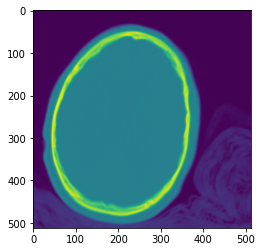

In [64]:
test_list = os.listdir("/home/wustl/brooks.kennedy/stage_2_train")
dataset = pydicom.dcmread("/home/wustl/brooks.kennedy/stage_2_train/"+test_list[0], force = True)
dataset.pixel_array.shape
plt.imshow(  dataset.pixel_array)
#generated_image.shape

In [65]:
data_mini

,Image,ID,Diagnoses,Hemmorhage
0,"[[15, 15, 14, 15, 17, 17, 17, 16, 16, 17, 18, ...",281278dce,[],False
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",ea8079d5d,[],False
2,"[[22, 23, 24, 24, 24, 23, 22, 23, 24, 25, 25, ...",a6a56fcd7,[],False
3,"[[-2000, -2000, -2000, -2000, -2000, -2000, -2...",487f2ad93,[],False
4,"[[27, 28, 30, 30, 29, 28, 27, 26, 26, 28, 28, ...",720222860,[],False
...,...,...,...,...
296,"[[-2000, -2000, -2000, -2000, -2000, -2000, -2...",a9dbfd9f1,[],False
297,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",8031d63c0,[],False
298,"[[-2000, -2000, -2000, -2000, -2000, -2000, -2...",8ae69ca77,[],False
299,"[[-2000, -2000, -2000, -2000, -2000, -2000, -2...",1fe3ba0b3,[],False
